# Tree-based ML and Feature Selection

**This week, your assignment is:**

- use our prepared churn data from week 2
- break our data into features and targets, and train and test sets
- use sklearn to fit a decision tree to the training data
    - plot the decision tree
    - change the max_depth of the decision tree to improve the model if needed (or tune it with a hyperparameter search)
- plot the correlations between features and targets
- use sklearn to fit a random forest model to predict churn from our dataset
    - plot the feature importances from the random forest
- choose some of the less-important features to remove from the model using feature importances and correlations and fit the random forest model to the new data
    - examine the feature importances after removing less important features
- write a short analysis of the results of your work


***Optional* advanced tasks:**
- use H2O to fit a random forest to our original, unmodified data (missing values and all)
    - you can decide if you want to break the data into train and test sets or not, but remember it's best to evaluate performance on a test or validation dataset
    - plot the H2O random forest's feature importances
- tune the random forest hyperparameters for the sklearn and/or H2O models
- use forward and/or backward selection with feature importances from a random forest model
- use recursive feature selection
- compare the various feature selection methods you tried and write a short summary

# Descision Tree

In [4]:
#import all necessary packages for descision tree model
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [5]:
#import in prepared churn data 
df = pd.read_csv('/Users/johnxie301/Desktop/Data Science 600/Assignment 4/churn_data_cleaned.csv',index_col='customerID')
df.head()

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,
7590-VHVEG,1,0,0,0,29.85,29.85,0
5575-GNVDE,34,1,1,1,56.95,1889.50,0
3668-QPYBK,2,1,0,1,53.85,108.15,1
7795-CFOCW,45,0,1,2,42.30,1840.75,0
9237-HQITU,2,1,0,0,70.70,151.65,1


In [6]:
#make sure there is no null and data types are int or float
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 2775-SEFEE
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tenure          7043 non-null   int64  
 1   PhoneService    7043 non-null   int64  
 2   Contract        7043 non-null   int64  
 3   PaymentMethod   7043 non-null   int64  
 4   MonthlyCharges  7043 non-null   float64
 5   TotalCharges    7043 non-null   float64
 6   Churn           7043 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 440.2+ KB


In [16]:
# break the data set to features and targets. 
features = df.drop('Churn', axis= 1 )
targets = df[['Churn']]

In [21]:
# use features and targets to split dataset to random testing and training set. Make random_state = 42 to compare same random sets while using other models
x_train, x_test,y_train, y_test = train_test_split(features, targets, stratify= targets , random_state= 42)


In [23]:
# create a descison tree model project
dt = DecisionTreeClassifier()
#input the training data
dt.fit(x_train, y_train)
#print training results and testing results we got from the model
print(dt.score(x_train, y_train))
print(dt.score(x_test, y_test))

0.9943203332071185
0.7166382737081204


Result: The training model using descision tree classifier appears to be an overfit. That means the models has run to well with training set. I should check the depth. 

In [24]:
#Check the depth of this model in default
dt.get_depth()

26

Personal statement: the plot will be a huge mass

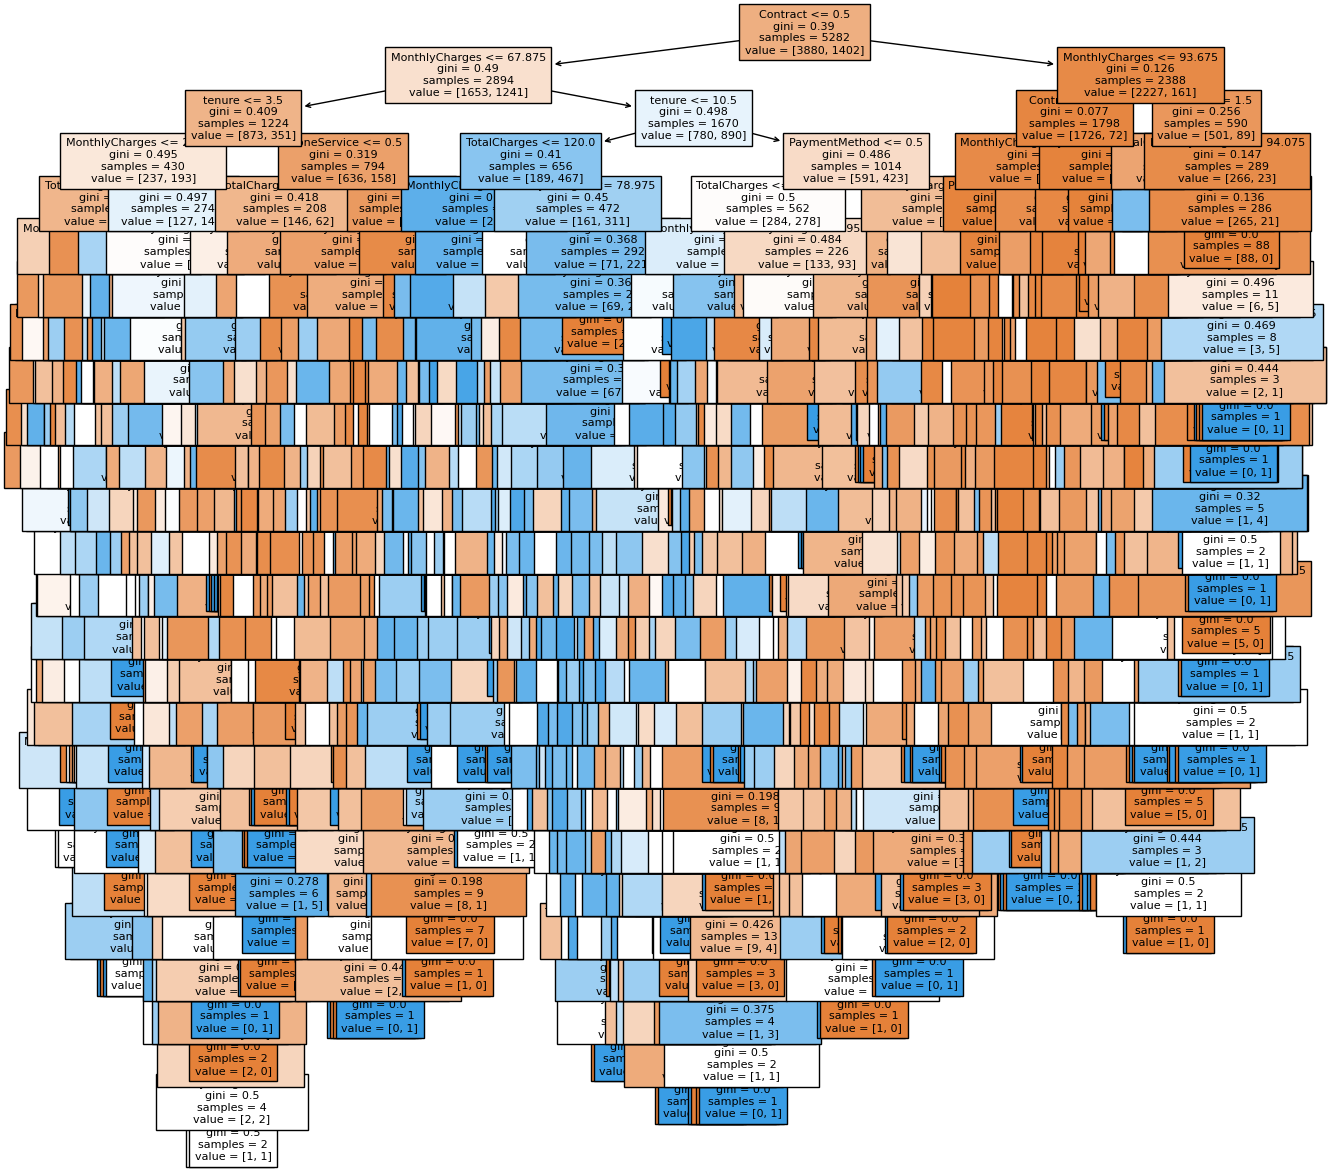

In [28]:
# Plot the first decision tree
f = plt.figure(figsize=(15, 15))

first_dt_plot = plot_tree(dt, fontsize=8,feature_names=features.columns.tolist(), filled=True)

Personal statement: It is a huge mass, definitely need to reduces the depth of dt model

In [48]:
#testing the model with different depth
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(x_train, y_train)

print(dt.score(x_train, y_train))
print(dt.score(x_test, y_test))

0.7872018174933737
0.7745599091425327


Comment: After trying depth from 2 to 8, depth of 3 has the closest score for training set and testing set

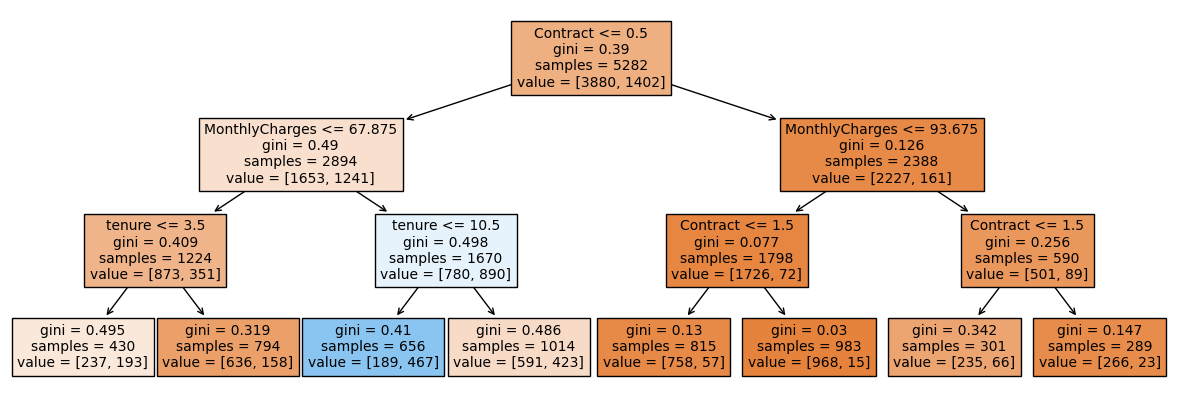

In [44]:
#setting the figure size to the best for visualization
f = plt.figure(figsize=(15, 5))
# Creating the second decsision tree plot with a depth of 3, make features columns to list the the update
second_dt_plot = plot_tree(dt, fontsize=10, feature_names=features.columns.tolist(), filled=True)

### Obeservation: Only three features was used to get a relatively precise model 

# Random Forests

In [53]:
#Trying Random RandomForestClassifier using the best fit depth in decision tree model
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth=3, random_state=42)
rfc.fit(x_train, y_train)

print(rfc.score(x_train, y_train))
print(rfc.score(x_test, y_test))
# Code was from Week_4_FTE.ipynb

0.7860658841347974
0.778534923339012


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Comment: The accuracy on training and testing is pretty close.

In [62]:
# trying a few more depth and leave the best result on this one
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth=5, random_state=42)
rfc.fit(x_train, y_train)

print(rfc.score(x_train, y_train))
print(rfc.score(x_test, y_test))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.8044301400984476
0.7978421351504826


Comment: Depth of 5 in a random forest model gives the best result on both the training and testing sets. With a accruacy difference of ~0.66%. It does do a little better than Descision tree model. I wanted to get a higher accuracy on both scores. So I decided to play with the features used in the random forest classifier.

In [65]:
# step 1: find the number of features
x_train.shape[1]

6

In [75]:
# the default of the features used should be sqrt of max features, which should be 2. Let's try 3-6 features.
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth=5, max_features= 3,random_state=42)
rfc.fit(x_train, y_train)

print(rfc.score(x_train, y_train))
print(rfc.score(x_test, y_test))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.8055660734570238
0.7978421351504826


Comment: The results gets bigger in difference as the features increases. So the fedault features 2 was probably the best fit.

In [76]:
#Take a look a the feature importances to have general idea of every features' correlation in the model
rfc.feature_importances_


array([0.22925447, 0.00653312, 0.36094416, 0.11450519, 0.20680934,
       0.08195372])

In [78]:
x_train.columns

Index(['tenure', 'PhoneService', 'Contract', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges'],
      dtype='object')

Comment: phone service and total charges appear to be somewhat irrelevent to the model

In [80]:
import seaborn as sbs

<Axes: >

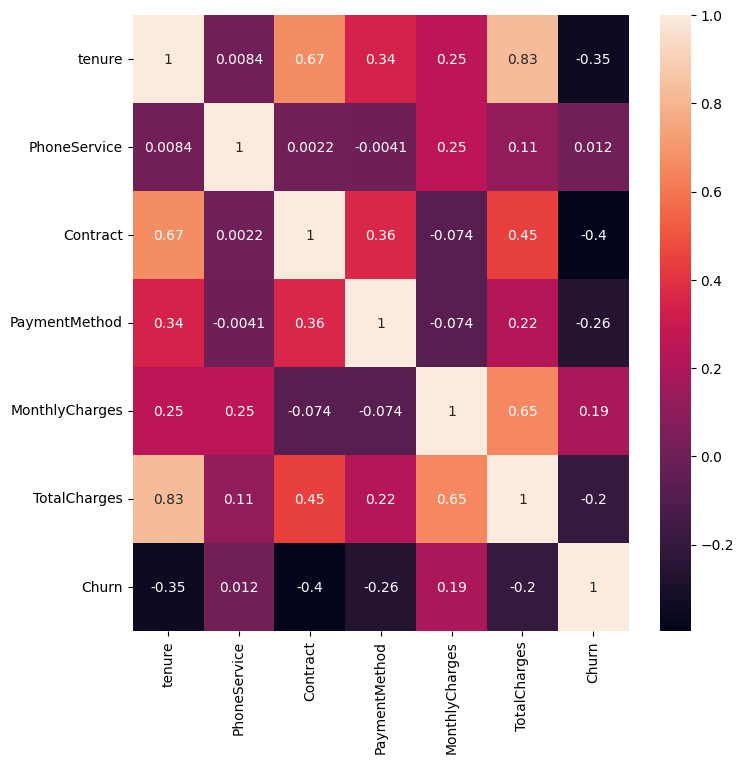

In [81]:
#create a correlation heatmap to get a better visulization
f = plt.figure(figsize=(8,8))
sbs.heatmap(df.corr(),annot= True)

Comment: Looks like phone service is irrelevent to Churn rate. The biggest factors could be tenure and contract. Suprisingly, monthly charges and total charges are not a big factor to churn.

In [84]:
#pip install scikit-plot

<Axes: title={'center': 'Feature Importance'}>

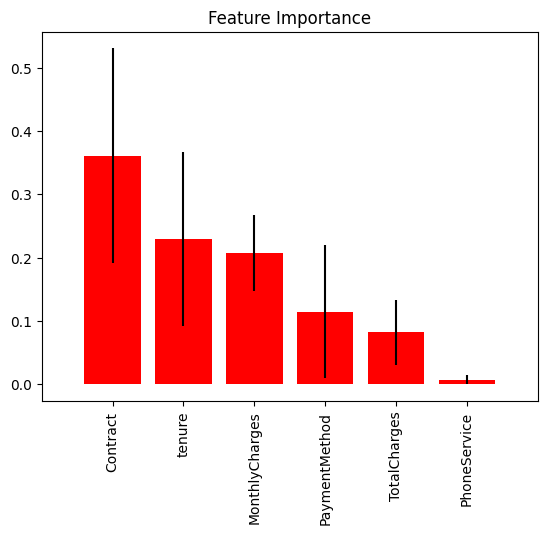

In [85]:

from scikitplot.estimators import plot_feature_importances
plot_feature_importances(rfc, feature_names=features.columns, x_tick_rotation=90)
# code is from Week_4_FTE.ipynb

Comment: Contract looks like the biggest factor in the random forest data set. This makes sense to me. Tenure is also another big factor that can be used for observation. Monthlycharges could work. But it appears to make little progress for the model. 
I can definitely drop Phone service column. 

In [113]:
#create a new split train test set without phoneserive column
new_features = features.drop(['PhoneService','TotalCharges'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(new_features, targets, stratify=targets, random_state=42)

In [118]:
rfc = RandomForestClassifier(max_depth=5, max_features=3, random_state=42)
rfc.fit(x_train, y_train)
print(rfc.score(x_train, y_train))
print(rfc.score(x_test, y_test))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.8051874290041651
0.7984099943214082


Comment: The testing accuracy has gone up by a really small percentage. It can almost be neglect. Looks like the random forest has already find the best fit to optimized the model. 

<Axes: title={'center': 'Feature Importance'}>

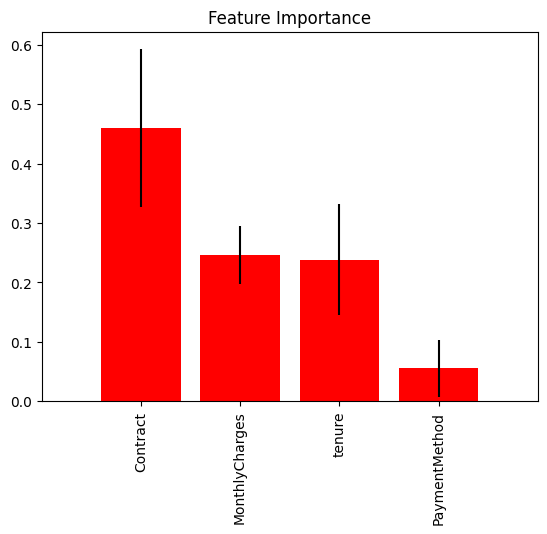

In [120]:
# let's take a look at the feature importance of the new random forest model.
plot_feature_importances(rfc, feature_names=new_features.columns, x_tick_rotation=90)

Comment: Looks like Payment Method has little effect on the model. We can try to remove that column to find out if the model can run even better. 


In [122]:
#create another new split train test set without phoneserive column
new_features_2 = features.drop(['PaymentMethod'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(new_features_2, targets, stratify=targets, random_state=42)

In [123]:
rfc = RandomForestClassifier(max_depth=5, max_features=3, random_state=42)
rfc.fit(x_train, y_train)
print(rfc.score(x_train, y_train))
print(rfc.score(x_test, y_test))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.8044301400984476
0.7915956842703009


Comment: Opps, looks like it just got worse. both accuracies has gone down a little bit. Maybe I can try change the depth and features to see if it helps.

In [131]:
rfc = RandomForestClassifier(max_depth=5, max_features=2, random_state=42)
rfc.fit(x_train, y_train)
print(rfc.score(x_train, y_train))
print(rfc.score(x_test, y_test))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.80367285119273
0.7893242475865985


Comment: I have tries different kinds of alternations on max depth and max features. new feature 1 with depth of 5 and features of 3 still give the best result. By removing Payment method, the features seems to have less varieties to optimize the model.

# Summary

### This week I have sepecified on decision tree classifier and random forest classifier models. Decision tree did a better job than my logistic regression model after I adjusted the max depth to solve the overfit issue. Even though I have ran random forest model last week. I did not fully understand what it was doing. After taking the class and understand that random forest creates many decision trees and take the mean of the results to give the best solution. I can understand better about how this model could help with catching the biggest factors to help us evaluate the data.
### By checking deatures importance, and removing the ones that are not helping the models with decisions. The Model has a slight improvement on accuracy. If I was having a larger dataset with more features. I believe the improvement will be more obvious. Overall, The random forest model does better than decision tree model and logistic regression model. 